In [1]:
###David R. Rice
###Phys 604 Prof. Zhu
###Lecture 20 Homework

In [2]:
#Interpolation HW given by CHao-Chin Yang
#Make an outline through points and use it to compute the area

In [3]:
import re
import numpy as np
from matplotlib import pyplot as plt
import math

In [4]:
#Input data into x and y arrays with re
inf=open('dataHW20','r')
lines=inf.readlines()
x1=[];x2=[];x3=[];x4=[]
y1=[];y2=[];y3=[];y4=[]
x=np.array([])
y=np.array([])
for line in lines:
    div=re.split('\s+',line)
    x1.append(float(div[0]))
    y1.append(float(div[1]))
    x2.append(float(div[2]))
    y2.append(float(div[3]))
    x3.append(float(div[4]))
    y3.append(float(div[5]))
    x4.append(float(div[6]))
    y4.append(float(div[7]))
x=np.append(x,[x1,x2,x3,x4])
y=np.append(y,[y1,y2,y3,y4])

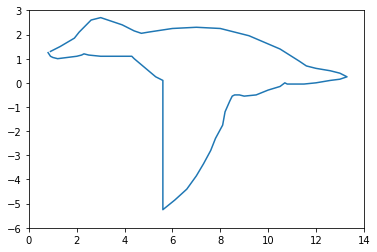

In [5]:
#Rough Plot using Plt
plt.plot(x,y)
plt.axis([0,14,-6,3])
plt.show()

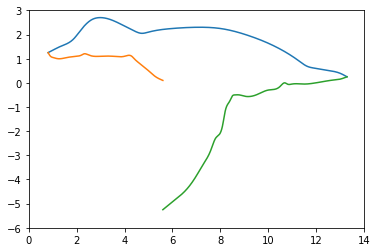

In [6]:
#Interpolate using CubicSpline
#Make sure to rerun whole page
from scipy.interpolate import CubicSpline
from scipy.interpolate import barycentric_interpolate 

#Split points into increasing and decreasing
a=np.amin(x)
b=np.amax(x)


#Clean up arrays to be always increasing and connect. Split before and after "wing" (at 5.6).
xlow=x[0:list(x).index(b)+1]
xhigh=x[len(x):list(x).index(b)-1:-1]
xlow=np.insert(xlow,0,x[list(x).index(a)])
xhigh1=xhigh[0:list(xhigh).index(5.6)+1]
xhigh2=xhigh[list(xhigh).index(5.6)+1:len(xhigh)]

ylow=y[0:list(x).index(b)+1]
yhigh=y[len(x):list(x).index(b)-1:-1]
ylow=np.insert(ylow,0,y[list(x).index(a)])
yhigh1=yhigh[0:list(xhigh).index(5.6)+1]
yhigh2=yhigh[list(xhigh).index(5.6)+1:len(xhigh)]


#Cubic spline with natural boundaries
cslow=CubicSpline(xlow,ylow,bc_type="natural")
cshigh1=CubicSpline(xhigh1,yhigh1,bc_type="natural")
cshigh2=CubicSpline(xhigh2,yhigh2,bc_type="natural")

#Plot
x1=np.linspace(a,b,2000)
x2=np.linspace(a,5.6,1000)
x3=np.linspace(5.6,b,1000)

plt.plot(x1,cslow(x1))
plt.plot(x2,cshigh1(x2))
plt.plot(x3,cshigh2(x3))
plt.axis([0,14,-6,3])
plt.show()

In [7]:
##Integrate
from scipy.integrate import simps
upper=simps(cslow(x1),x1)
lower1=simps(cshigh1(x2),x2)
lower2=simps(cshigh2(x3),x3)
area=upper-lower1-lower2
print("The area enclosed in the bird shape is approximately" + str(area))

The area enclosed in the bird shape is approximately28.863373854012806
